# 01. PyTorch Workflow Fundamentals

The core idea of **machine learning** and **deep learning** is:

> Take some data from the past, train an algorithm (such as a neural network) to discover patterns in it, and then use those patterns to make predictions about the future.

There are many ways to do this, and new approaches are being discovered all the time.

But let’s start small.

👉 Imagine we have a **straight line**. Our goal will be to build a PyTorch model that learns the pattern of that line and matches it.

---

## 🔑 PyTorch Workflow Steps

### 1. Getting Data Ready

Every machine learning project starts with data. In PyTorch, data can come in many forms: numbers, images, text, audio, and more.

For our example, we’ll create a **simple dataset representing a straight line**. This gives us something easy to work with while learning how PyTorch handles data.

---

### 2. Building a Model

A model in PyTorch is like a **function with learnable parameters**. Its job is to take inputs (our data), apply transformations, and return predictions.

When building a model, we also define:

* **Loss function** → measures how far off the model’s predictions are from the actual data.
* **Optimizer** → tells PyTorch how to update the model’s parameters to improve predictions.
* **Training loop** → a process that runs many times, allowing the model to learn patterns step by step.

---

### 3. Fitting the Model to Data (Training)

Training means **showing the model examples and letting it adjust its parameters to reduce the loss**.

* We pass the training data into the model.
* The model makes predictions.
* The loss function compares predictions to the actual values.
* The optimizer updates the parameters to make the model better.

This loop repeats many times until the model learns the underlying pattern.

---

### 4. Making Predictions and Evaluating (Inference)

Once trained, the model can make predictions on new or unseen data. This is called **inference**.

Evaluation means checking **how well the model’s predictions match the true values**. For our straight-line example, we’ll see how close the model’s line is to the actual line.

---

### 5. Saving and Loading a Model

Training a model can take time, so it’s useful to save it once it has learned.

* **Saving** → store the model’s parameters (weights).
* **Loading** → bring the model back later without retraining.

This makes it possible to use the same model across projects or share it with others.

---

### 6. Putting It All Together

Finally, we combine all the steps into a **complete workflow**:

1. Prepare the data
2. Build the model
3. Train the model
4. Evaluate the model
5. Save/load the model

This workflow forms the foundation of working with PyTorch. The same process works whether you’re predicting a straight line, classifying images, or building advanced neural networks.

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.2'

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# X[:10], y[:10]

In [5]:
X.shape

torch.Size([50, 1])

## 📝 Notes: Features and Labels

In machine learning, data is usually split into two parts:

### **1. Features (X)**

* Also called **inputs**, **independent variables**, or **predictors**.
* These are the pieces of information we give to the model so it can learn patterns.
* Example:

  * In predicting house prices → size, number of rooms, location.
  * In our straight-line example → values of `x` along the line.

---

### **2. Labels (y)**

* Also called **targets**, **outputs**, or **dependent variables**.
* These are the values we want the model to predict.
* Example:

  * In predicting house prices → the actual price of the house.
  * In our straight-line example → values of `y` that match the line.

---

👉 Together:

* **X (features)** → what the model sees.
* **y (labels)** → what the model tries to predict.

The model’s job is to learn the relationship between **X** and **y** so that when it sees new **X values**, it can correctly predict the corresponding **y values**.

# 📊 Splitting Data into Training and Test Sets

Before building a machine learning model, one of the **most important steps** is to split the dataset into different parts. This helps us train the model properly and then check how well it performs on unseen data.

### Why do we split the data?

* If we only trained and tested on the **same data**, the model could just memorize it (overfitting), instead of actually learning patterns.
* By splitting, we make sure the model **learns** on one set (training) and is **evaluated** on another (testing).

---

### Common Data Splits

| **Split**          | **Purpose**                                                                    | **Amount of total data** | **How often is it used?** |
| ------------------ | ------------------------------------------------------------------------------ | ------------------------ | ------------------------- |
| **Training set**   | The model learns from this data (like studying course materials).              | \~60–80%                 | Always                    |
| **Validation set** | Used to fine-tune the model (like taking a practice exam before the final).    | \~10–20%                 | Often, but not always     |
| **Testing set**    | Used to evaluate the model’s performance on unseen data (like the final exam). | \~10–20%                 | Always                    |

---

### In Our Case

For now, we’ll just use a **training set** and a **test set**:

* **Training set** → The model learns patterns here.
* **Test set** → We check how well the model has learned by comparing predictions against this unseen data.

---

### ⚠️ Important Note

When working with **real-world datasets**, splitting is usually done **right at the start** of a project.

* The **test set should always remain separate** and never be used for training.
* This ensures that the final evaluation truly reflects how well the model generalizes to **new, unseen examples**.

In [6]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
     Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


    plt.legend(prop={"size": 14})

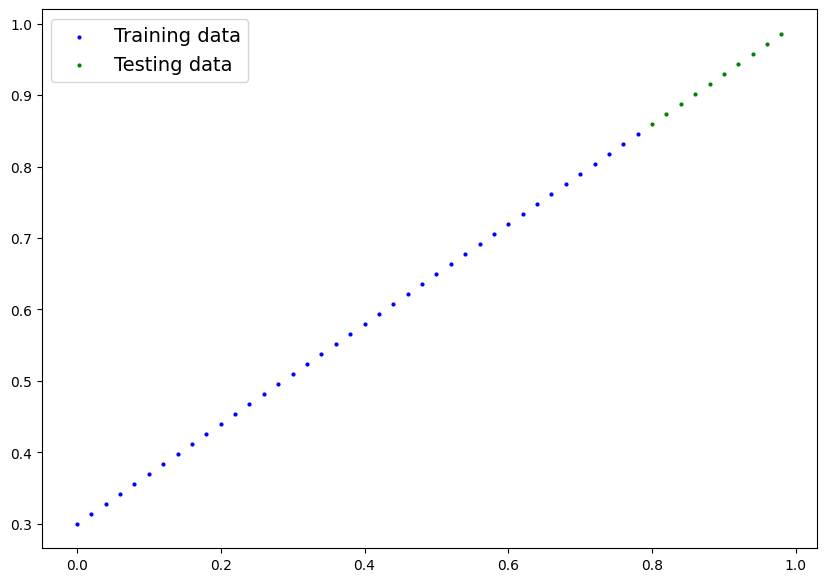

In [8]:
plot_predictions()

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                    requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + bias

In [10]:
SEED = 42

manual_seed = torch.manual_seed(seed=SEED)

model_0 = LinearRegressionModel()

print(f"Model paramenters: {list(model_0.parameters())} \n")
print(f"Model state dict: {model_0.state_dict()}")

Model paramenters: [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)] 

Model state dict: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [11]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [12]:
# y_preds

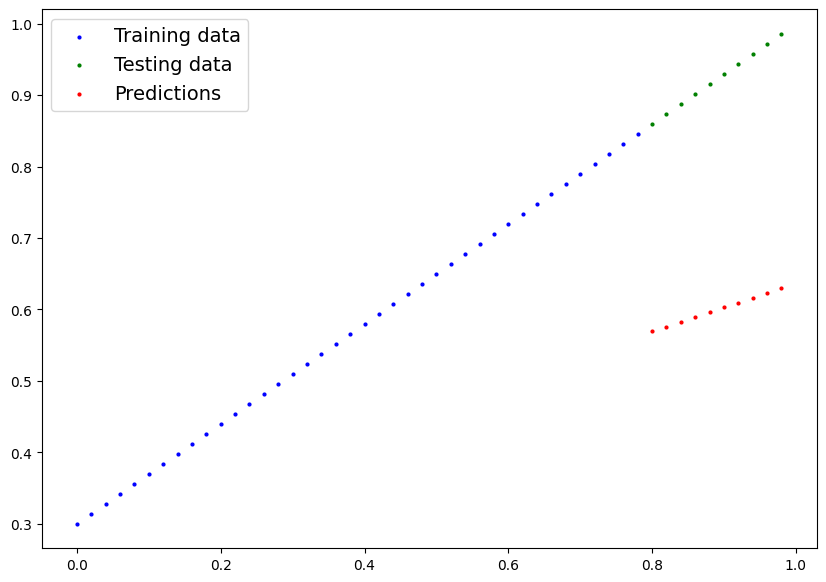

In [13]:
plot_predictions(predictions=y_preds)

In [14]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.5694],
        [0.5761],
        [0.5828],
        [0.5896],
        [0.5963],
        [0.6030],
        [0.6098],
        [0.6165],
        [0.6232],
        [0.6300]])


In [15]:
y_test - y_preds

tensor([[0.2906],
        [0.2979],
        [0.3052],
        [0.3124],
        [0.3197],
        [0.3270],
        [0.3342],
        [0.3415],
        [0.3488],
        [0.3560]])

# 🔹 Loss Functions and Optimizers in PyTorch

When building a machine learning model, simply having **weights and biases** isn’t enough.
We need two important components to make the model **learn**:

1. **Loss function** → tells us *how wrong* the model is.
2. **Optimizer** → tells the model *how to adjust its weights and biases* to improve.

---

## 1. Loss Function 📉

* **Definition:** A loss function measures the difference between the model’s predictions (`y_pred`) and the actual values (`y_true`).
* **Goal:** Make this number as **low as possible** → the lower the loss, the better the model’s predictions.

### Common Loss Functions:

1. **Mean Absolute Error (MAE)** – `torch.nn.L1Loss()`

   * Used for **regression problems** (predicting continuous values, like house prices).
   * It calculates the **average absolute difference** between predictions and targets.
   * Intuition: *"On average, how far off are we from the true values?"*

   Example:

   $$
   MAE = \frac{1}{n} \sum |y_{true} - y_{pred}|
   $$

---

2. **Binary Cross Entropy (BCE)** – `torch.nn.BCELoss()`

   * Used for **binary classification problems** (yes/no, spam/not spam, cat/dog).
   * It compares predicted probabilities (between 0 and 1) with actual labels (0 or 1).
   * Intuition: *"How well is the model predicting true probabilities?"*
   * Works well with a **sigmoid activation function** in the final layer.

   Example:

   $$
   BCE = - \frac{1}{n} \sum \big[y_{true}\log(y_{pred}) + (1-y_{true})\log(1-y_{pred})\big]
   $$

---

## 2. Optimizer ⚡

* **Definition:** The optimizer updates the model’s weights and biases to **reduce the loss** using gradient descent.
* **Goal:** Adjust parameters step by step until the model learns good patterns.

### Common Optimizers:

1. **Stochastic Gradient Descent (SGD)** – `torch.optim.SGD()`

   * The most basic optimizer.
   * Updates weights using small steps in the opposite direction of the gradient.
   * Often requires careful tuning of the **learning rate**.
   * Works well for simple problems.

   Update rule:

   $$
   w = w - \eta \cdot \nabla L
   $$

   where $\eta$ = learning rate, $\nabla L$ = gradient of loss.

---

2. **Adam Optimizer** – `torch.optim.Adam()`

   * One of the most popular optimizers.
   * Combines the ideas of **momentum** (remembers past gradients) and **adaptive learning rates** (adjusts learning rate for each parameter).
   * Usually works **better and faster** than plain SGD.
   * Often a good “default” choice when starting a new project.

---

## ✅ Quick Summary

* **Loss Function** = *how wrong are we?*

  * MAE → for regression.
  * BCE → for binary classification.

* **Optimizer** = *how do we improve?*

  * SGD → simple, slower, but foundational.
  * Adam → smarter, faster, often better for complex problems.

# 🔹 What is Learning Rate?

The **learning rate** is one of the most important hyperparameters in training a neural network.

It controls **how big a step** the optimizer takes when updating the model’s weights and biases.

---

## ✨ Intuition

* Imagine you’re **climbing down a hill** (minimizing the loss).
* Each step you take is guided by the slope (the gradient).
* The **learning rate** decides *how long each step is*:

  * **Too big (high learning rate):** You might overshoot and never reach the bottom (model won’t learn).
  * **Too small (low learning rate):** You’ll take tiny steps, moving very slowly, and training takes forever.
  * **Just right:** You’ll reach the bottom efficiently without bouncing around too much.

---

## 🧮 Formula (Weight Update)

$$
w = w - \eta \cdot \nabla L
$$

* $w$ = weight
* $\eta$ = **learning rate**
* $\nabla L$ = gradient of the loss

---

## 🔹 Example:

* Learning rate = **0.1** → big steps → might jump over the solution.
* Learning rate = **0.0001** → tiny steps → slow learning.
* Learning rate = **0.01** → often a good starting point.

---

## ✅ Rule of Thumb

* Start with `0.001` or `0.01` (common defaults in PyTorch and TensorFlow).
* If training is unstable (loss bouncing up and down), **lower the learning rate**.
* If training is too slow (loss decreasing very slowly), **increase the learning rate**.


In [16]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# 🔄 PyTorch Training Loop

Training a PyTorch model usually follows the same **five key steps**. Each step ensures the model learns by improving its weights and biases.

---

## **1. Forward Pass**

➡️ The input data is passed through the model.
➡️ The model performs calculations (`forward()` function) to generate predictions.

```python
y_pred = model(x_train)
```

---

## **2. Calculate the Loss**

➡️ The predictions are compared against the true labels.
➡️ The **loss function** measures how far off the predictions are.

```python
loss = loss_fn(y_pred, y_train)
```

---

## **3. Zero the Gradients**

➡️ By default, PyTorch **accumulates gradients** after every backward pass.
➡️ We reset them to zero before calculating new gradients.

```python
optimizer.zero_grad()
```

---

## **4. Backpropagation (Backward Pass)**

➡️ Compute the gradient of the loss with respect to each model parameter (`weights` & `biases`).
➡️ This step tells the model *which direction* to move to reduce the loss.

```python
loss.backward()
```

---

## **5. Update Parameters (Optimizer Step)**

➡️ The optimizer updates the model’s parameters using the calculated gradients.
➡️ This is where **gradient descent** (or a variant like Adam/SGD) happens.

```python
optimizer.step()
```

---

# 🔑 Summary of the Loop

1. **Forward pass** → Make predictions.
2. **Loss calculation** → Compare predictions vs. truth.
3. **Zero gradients** → Reset old gradients.
4. **Backward pass** → Calculate new gradients.
5. **Optimizer step** → Update weights to improve predictions.

This loop repeats for multiple **epochs** until the model learns patterns in the data.

In [17]:
torch.manual_seed(seed=SEED)

epoch = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epoch):
    ## Training 
    
    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)


    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad for optimizer 
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # 1. Make predictions
        test_pred = model_0(X_test)

        # 2. Calculate loss on the test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        # Print out what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")    

Epoch: 0 | MAE Train Loss: 0.14169074594974518 | MAE Test Loss: 0.3198745846748352 
Epoch: 10 | MAE Train Loss: 0.12648078799247742 | MAE Test Loss: 0.28516465425491333 
Epoch: 20 | MAE Train Loss: 0.11127082258462906 | MAE Test Loss: 0.25045472383499146 
Epoch: 30 | MAE Train Loss: 0.0960608422756195 | MAE Test Loss: 0.21574480831623077 
Epoch: 40 | MAE Train Loss: 0.08085088431835175 | MAE Test Loss: 0.1810348629951477 
Epoch: 50 | MAE Train Loss: 0.06564091145992279 | MAE Test Loss: 0.14632496237754822 
Epoch: 60 | MAE Train Loss: 0.050430942326784134 | MAE Test Loss: 0.11161501705646515 
Epoch: 70 | MAE Train Loss: 0.035220976918935776 | MAE Test Loss: 0.07690508663654327 
Epoch: 80 | MAE Train Loss: 0.02001100964844227 | MAE Test Loss: 0.04219517856836319 
Epoch: 90 | MAE Train Loss: 0.004801043774932623 | MAE Test Loss: 0.007485252805054188 


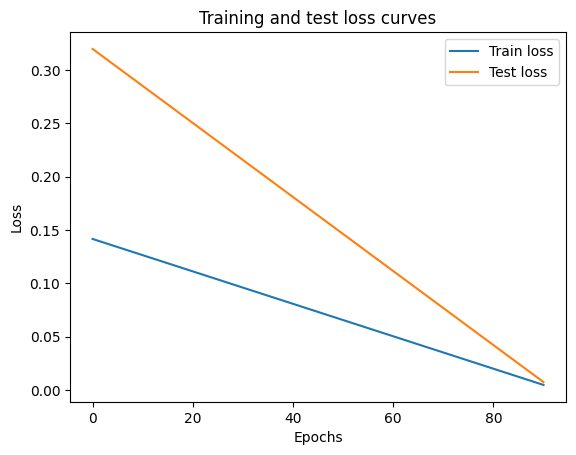

In [18]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [19]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7033])), ('bias', tensor([0.1288]))])


In [20]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds, y_test

(tensor([[0.8626],
         [0.8767],
         [0.8908],
         [0.9048],
         [0.9189],
         [0.9330],
         [0.9470],
         [0.9611],
         [0.9752],
         [0.9892]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

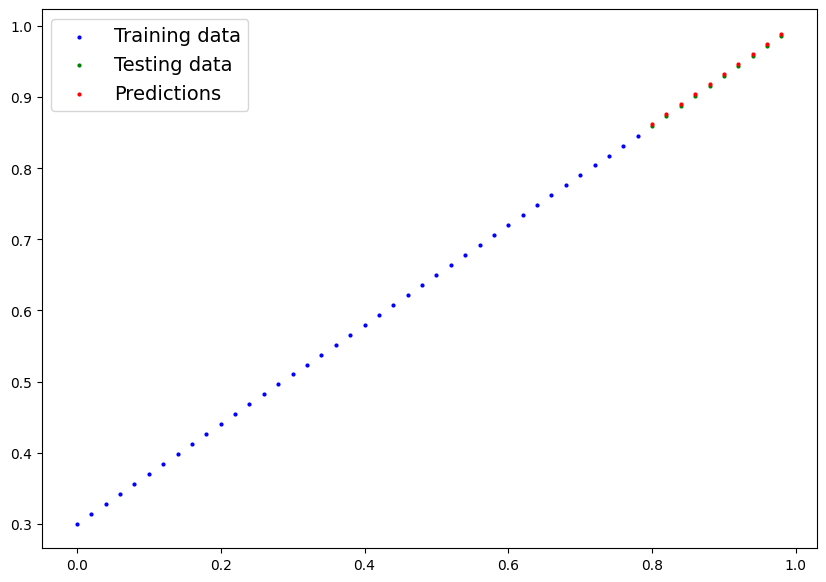

In [21]:
plot_predictions(predictions=y_preds)

In [22]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), 
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [23]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) 

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [24]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

In [25]:
print(f"Using device: {device}")

Using device: mps


In [26]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
# X[:10], y[:10]

In [27]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

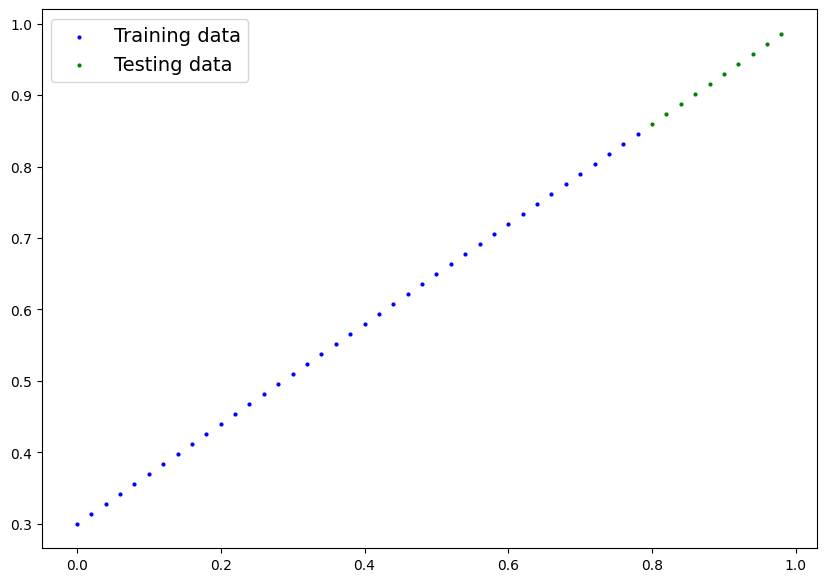

In [28]:
plot_predictions(X_train, y_train, X_test, y_test)

In [29]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.liner_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.liner_layer(x)

In [30]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (liner_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('liner_layer.weight', tensor([[0.7645]])),
              ('liner_layer.bias', tensor([0.8300]))]))

In [31]:
next(model_1.parameters()).device

device(type='cpu')

In [32]:
model_1.to(device)
next(model_1.parameters()).device

device(type='mps', index=0)

In [33]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [34]:
torch.manual_seed(seed=SEED)

epochs = 1000 

# X_train = X_train.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)


        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779270172119 | Test loss: 0.5739762783050537
Epoch: 100 | Train loss: 0.0062156799249351025 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


In [35]:
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('liner_layer.weight', tensor([[0.6968]], device='mps:0')),
             ('liner_layer.bias', tensor([0.3025], device='mps:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [36]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='mps:0')

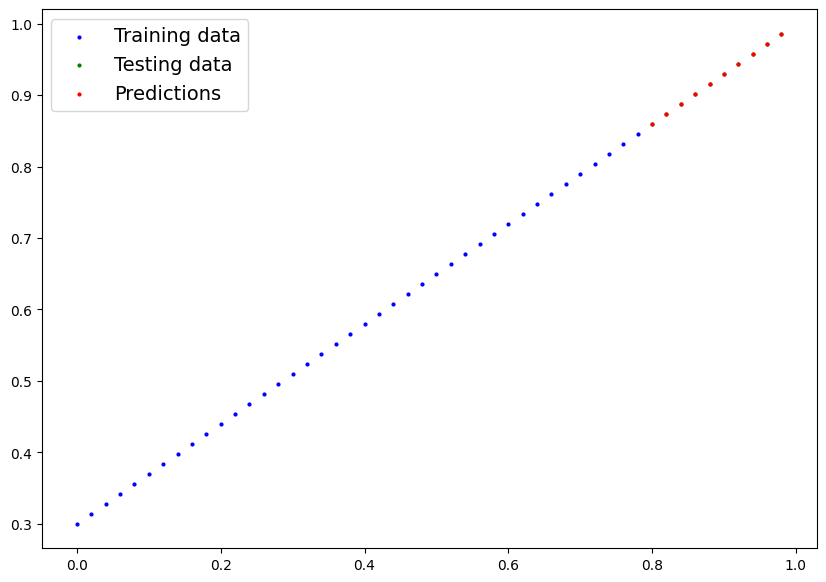

In [39]:
plot_predictions(predictions=y_preds.cpu())

In [40]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [41]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (liner_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
mps:0
